<a href="https://colab.research.google.com/github/ImperB-riven/DRAFT/blob/main/xlsltk_chap7_svm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
from numpy import genfromtxt
from sklearn.svm import SVC
name = 'https://raw.githubusercontent.com/DSML-book/Programs/master/Chapter7/svmcirc.csv'
data = genfromtxt (name, delimiter =',')
x = data [: ,[0 ,1]] #vectors are rows
y = data [: ,[2]]. reshape(len(x) ,) #labels
tmp = np.sum(np.power(x ,2) ,axis =1).reshape(len(x) ,1)
z = np.hstack ((x,tmp))
clf = SVC(C = np.inf , kernel='linear')
clf.fit(z,y)
print("Support Vectors \n", clf. support_vectors_ )
print("Support Vector Labels ",y[clf.support_ ])
print("Nu",clf. dual_coef_ )
print("Bias",clf. intercept_ )

Support Vectors 
 [[ 0.038758    0.53796     0.29090314]
 [-0.49116    -0.20563     0.28352184]
 [-0.45068    -0.04797     0.20541358]
 [-0.061107   -0.41651     0.17721465]]
Support Vector Labels  [-1. -1.  1.  1.]
Nu [[ -46.49249413 -249.01807328  265.31805855   30.19250886]]
Bias [5.617891]


(50, 50)
Support Vectors 
 []
Support Vector Labels  [-1. -1.  1.  1.]
Nu  [[ -46.49249413 -249.01807328  265.31805855   30.19250886]]
Bias  [5.617891]
(4000000, 50)


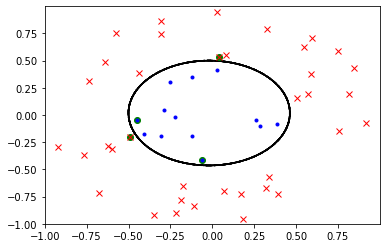

In [4]:
import numpy as np , matplotlib .pyplot as plt
from numpy import genfromtxt
from sklearn.svm import SVC
def mykernel(U,V):
  tmpU = np.sum(np.power(U ,2) ,axis =1).reshape(len(U) ,1)
  U = np.hstack ((U,tmpU))
  tmpV = np.sum(np.power(V ,2) ,axis =1).reshape(len(V) ,1)
  V = np.hstack ((V,tmpV))
  K = U @ V.T
  print(K.shape)
  return K

# read in the data
inp = genfromtxt (name, delimiter =',')
data = inp [: ,[0 ,1]] #vectors are rows
y = inp [: ,[2]]. reshape(len(data) ,) #labels
clf = SVC(C = np.inf , kernel=mykernel , gamma='auto') # custom kernel

# clf = SVC(C = np.inf , kernel =" rbf", gamma='scale ') # inbuilt
clf.fit(data ,y)
print("Support Vectors \n", clf. support_vectors_ )
print("Support Vector Labels ",y[clf.support_ ])
print("Nu ",clf. dual_coef_ )
print("Bias ",clf. intercept_ )

# plot
d = 0.001
x_min , x_max = -1,1
y_min , y_max = -1,1
xx , yy = np.meshgrid(np.arange(x_min , x_max , d), np.arange(y_min ,
y_max , d))
plt.plot(data[clf.support_ ,0], data[clf.support_ ,1],'go')
plt.plot(data[y==1 ,0] , data[y==1 ,1] ,'b.')
plt.plot(data[y==-1,0], data[y==-1,1],'rx')
Z = clf.predict(np.c_[xx.ravel (), yy.ravel ()])
Z = Z.reshape(xx.shape)
plt.contour(xx , yy , Z,colors ="k")
plt.show ()